# Battle at The Berrics (BATB) Data

When I watch the BATB videos I always kept asking to myself questions 
related to the statistics of the tricks tried/landed/not-landed. The high
number of combinations for tricks fascinates me. As I'm a data scientist, and
inspired by the work of George Murphy (who did an <a href="http://georgelmurphy.com/berrics/">awesome job for BATB7 data</a>,
I decided to do something similar for BATBX and want to extend for other issues
in the future.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
matplotlib.style.use('fivethirtyeight') #'ggplot')
from ggplot import *
from IPython.display import HTML

In [2]:
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this Jupyter notebook is by default hidden for easier reading.
<b>To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.</b>''')

In [3]:
tricks_df = pd.read_excel('Battle at The Berrics database 2.xlsx', sheetname='Tricks')
#tricks_df = pd.read_csv('https://docs.google.com/spreadsheets/d/1_iphrZL28nEdhB7Wz0xrBxbmqF4LkFiBhnkSy0maRJQ' +
#                   '/export?gid=0&format=csv')

Here is some sample of the table. You can view the original as a <a href="https://docs.google.com/spreadsheets/d/1_iphrZL28nEdhB7Wz0xrBxbmqF4LkFiBhnkSy0maRJQ/edit?usp=sharing">Google Spreadsheet</a>.

In [4]:
tricks_df = tricks_df.fillna('')
tricks_df.sample(8).sort_values(['Battle', 'Trick number'])

,Round,Battle,Trick number,Skateboarder,stance,side,skate spin,body spin,rotations,flip,after,offensive/defensive,Against,Status,letters
48,1,1,26,Micky Papa,Fakie,,,,Triple,Kickflip,,offensive,Cody Cepeda,landed,SK
207,1,4,14,Youness Amrani,Fakie,,Varial,,,Heelflip,,offensive,Tom Asta,not landed,S
412,1,8,12,Louie Lopez,Switch,,,,,Kickflip,,defensive,Sean Malto,not landed,S
633,1,12,25,Legion of Doom,Nollie,Frontside,,180,,Heelflip,,defensive,PJ Ladd,not landed,SKAT
1113,2,19,6,Tom Asta,Nollie,,,,,Kickflip,,offensive,Chris Joslin,landed,
1244,2,20,30,Moose,Fakie,,Bigspin,,,Heelflip,,offensive,PJ Ladd,landed,SKAT
1560,2,24,39,Felipe Gustavo,Fakie,,,,Double,Kickflip,,defensive,Luan Oliveira,landed,S
1604,3,25,17,Chris Joslin,Switch,,,,,Heelflip,,offensive,Luan Oliveira,landed,


In [5]:
trick_names = []
for i in range(tricks_df.shape[0]):
    trick = ''
    for e in map(str, tricks_df.loc[:, 'stance':'after'].iloc[i, :].values):
        if e != '':
            trick += ' ' + e
    trick_names.append(trick[1:])

tricks_df['Trick'] = trick_names
#tricks.to_csv('tricks.csv')

In [6]:
tricks_df.loc[tricks_df['body spin'].isin(['Halfcab', 'Caballerial']), 'stance'] = 'Fakie'

# Number of tricks so far (June 25, 2017 - before finals)

In [7]:
tricks_df.shape[0]

1812

Let's see what is the distribution of stances (regular, fakie, switch and nollie)

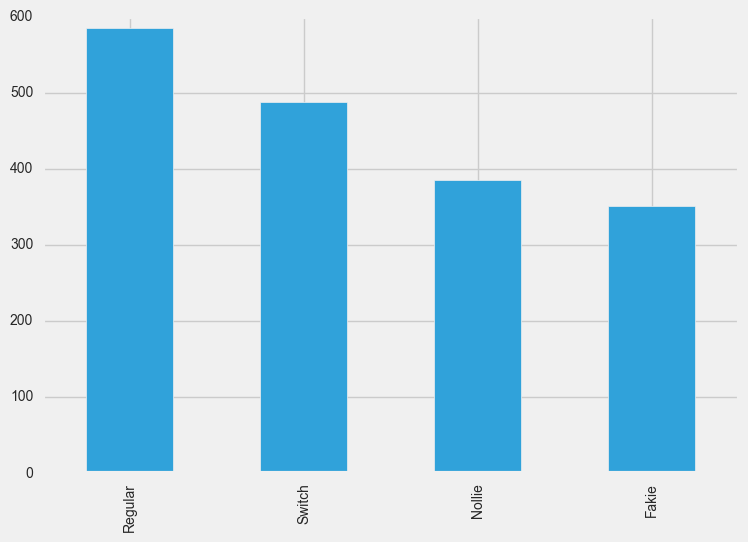

In [8]:
stance_counts = tricks_df['stance'].replace('', 'Regular').value_counts()
stance_counts.plot(kind='bar')
plt.show()

# Starting and ending tricks
### How did skaters start the battle?

In [9]:
starting = tricks_df[(tricks_df['Trick number'] == 1) & (tricks_df['offensive/defensive'] == 'offensive')][['Skateboarder', 'Against', 'Trick']]
starting

,Skateboarder,Against,Trick
0,Micky Papa,Cody Cepeda,Switch Frontside 360
61,Miles Silvas,Ishod Wair,Kickflip
131,Blake Carpenter,Felipe Gustavo,Switch Frontside Shuvit
183,Youness Amrani,Tom Asta,Kickflip
229,Morgan Smith,Carlos Ribeiro,Frontside Shuvit
285,Eric Koston,Nick Tucker,360 Flip
327,Trent McClung,Moose,Kickflip
391,Sean Malto,Louie Lopez,Kickflip
462,Walker Ryan,Will Fyock,Frontside Shuvit
510,Shane O'neill,Davis Torgerson,Backside Bigspin


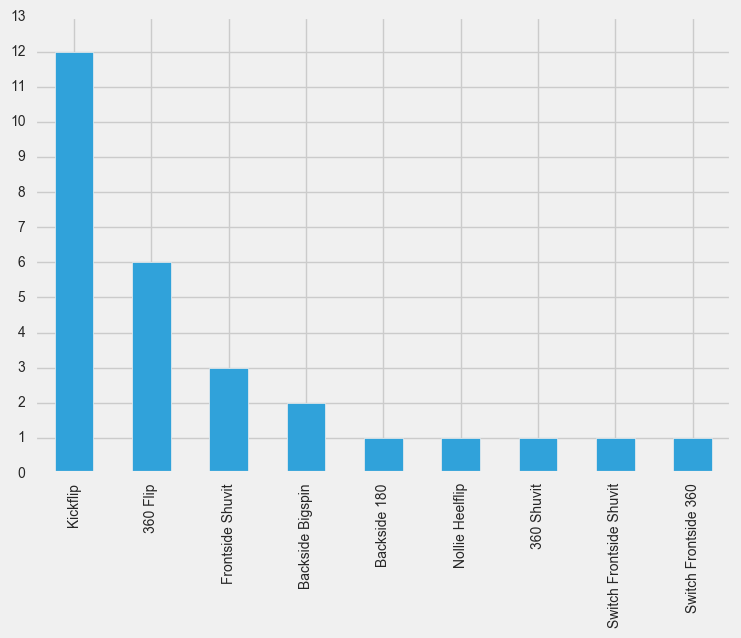

In [10]:
starting['Trick'].value_counts().plot('bar', yticks=range(2+max(starting['Trick'].value_counts())))
plt.show()

### What were the last tricks in each battle?

In [11]:
ending = tricks_df[tricks_df.letters == 'SKATE'][['Skateboarder', 'Against', 'Trick']]
ending

,Skateboarder,Against,Trick
60,Micky Papa,Cody Cepeda,Switch Frontside Biggerspin
130,Miles Silvas,Ishod Wair,Bigspin Heelflip
182,Blake Carpenter,Felipe Gustavo,Fakie Hardflip
228,Youness Amrani,Tom Asta,Switch 360 Flip
284,Carlos Ribeiro,Morgan Smith,Switch Backside 180 Kickflip
326,Eric Koston,Nick Tucker,Switch Frontside 360 Shuvit
390,Trent McClung,Moose,Nollie Double Kickflip
461,Louie Lopez,Sean Malto,Hardflip
509,Walker Ryan,Will Fyock,Switch Ollie Late Flip
557,Davis Torgerson,Shane O'neill,Backside Biggerspin


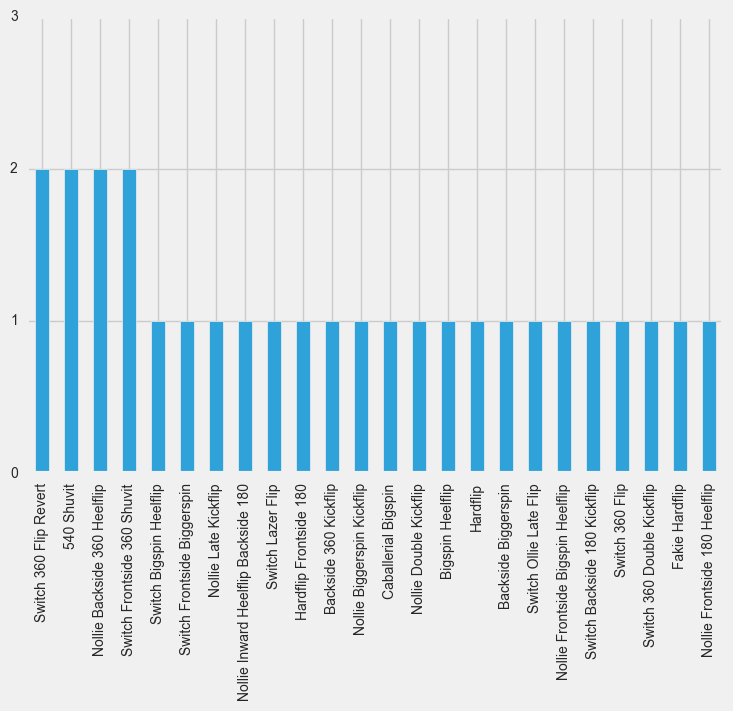

In [12]:
ending['Trick'].value_counts().plot('bar', yticks=range(2+max(ending['Trick'].value_counts())))
plt.show()

In [13]:
land_counts = pd.DataFrame(tricks_df[['Skateboarder', 'Status', 'Trick number']].groupby(['Skateboarder', 'Status']).agg('count'))
#land_counts

In [14]:
landed = tricks_df[tricks_df.Status=='landed']
notlanded = tricks_df[tricks_df.Status=='not landed']
almostlanded = tricks_df[tricks_df.Status=='almost landed']

landed_counts = pd.DataFrame(landed[['Skateboarder', 'Trick number']].groupby(['Skateboarder']).agg('count'))
notlanded_counts = pd.DataFrame(notlanded[['Skateboarder', 'Trick number']].groupby(['Skateboarder']).agg('count'))
almostlanded_counts = pd.DataFrame(almostlanded[['Skateboarder', 'Trick number']].groupby(['Skateboarder']).agg('count'))

In [15]:
landed_df = pd.DataFrame({
        'landed'    : landed_counts['Trick number'],
        'notlanded' : notlanded_counts['Trick number'],
        'almostlanded' : almostlanded_counts['Trick number'],
    })

landed_df = landed_df.fillna(0)
#landed_df

## Landed tricks
Here we will see the number of landed, almost-landed (do-overs) and not-landed tricks.

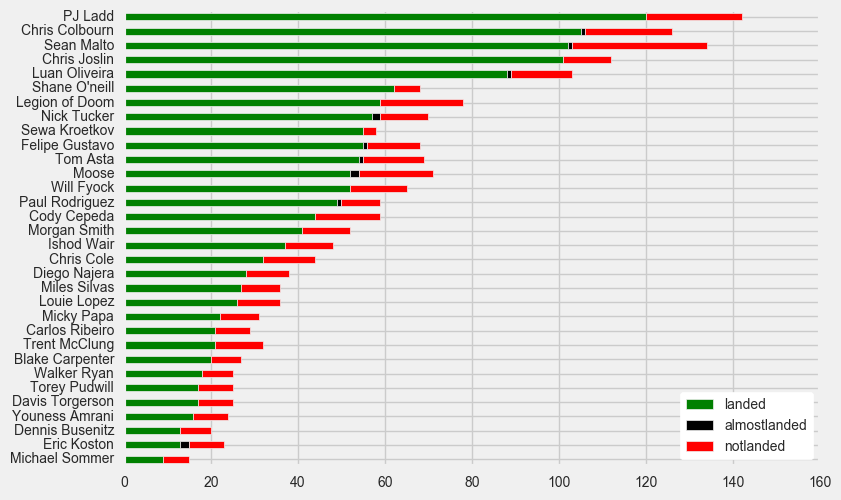

In [16]:
landed_df[['landed', 'almostlanded', 'notlanded']].sort_values('landed').plot(kind='barh', color=['green', 'black', 'red'], stacked=True)
legend = plt.legend(frameon = 1, loc='lower right')
frame = legend.get_frame()
frame.set_color('white')
plt.show()

In [17]:
#sns.countplot(y=tricks_df['Skateboarder'])
#plt.show() # Try to do with 2 columns

But if we show just the raw values, we would miss the ones that had a few number of not-landed tricks when compared to the total. So let's plot again using percentages.

In [18]:
landed_df = landed_df.assign(Total=lambda landed_df: landed_df.almostlanded + landed_df.landed + landed_df.notlanded)
landed_df = landed_df.assign(lperc=lambda landed_df: 100 * landed_df.landed / landed_df.Total)
landed_df = landed_df.assign(almlperc=lambda landed_df: 100 * landed_df.almostlanded / landed_df.Total)
landed_df = landed_df.assign(notlperc=lambda landed_df: 100 * landed_df.notlanded / landed_df.Total)

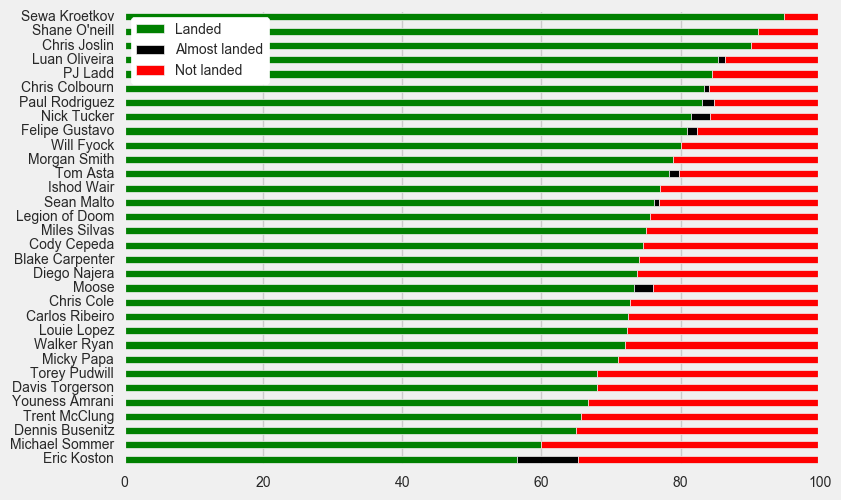

In [19]:
landed_df[['lperc', 'almlperc', 'notlperc']].sort_values('lperc').rename(
    columns={'almlperc': "Almost landed",
             'lperc': "Landed",
             'notlperc': "Not landed"}).plot(kind='barh', color=['green', 'black', 'red'], stacked=True)
legend = plt.legend(frameon = 1, loc='upper left')
frame = legend.get_frame()
frame.set_color('white')
plt.show()

# Most tried/landed/not-landed tricks

In [20]:
#tricks[['Trick number', 'trick_names', 'Status']].groupby(['trick_names', 'Status']).agg('count')
landed_counts = pd.DataFrame(landed[['Trick number', 'Trick']].groupby(['Trick']).agg('count'))
notlanded_counts = pd.DataFrame(notlanded[['Trick number', 'Trick']].groupby(['Trick']).agg('count'))
almostlanded_counts = pd.DataFrame(almostlanded[['Trick number', 'Trick']].groupby(['Trick']).agg('count'))

landed_df = pd.DataFrame({
        'landed'    : landed_counts['Trick number'],
        'notlanded' : notlanded_counts['Trick number'],
        'almostlanded' : almostlanded_counts['Trick number'],
    })

landed_df = landed_df.fillna(0)
landed_df = landed_df.assign(Total=lambda landed_df: landed_df.almostlanded + landed_df.landed + landed_df.notlanded)

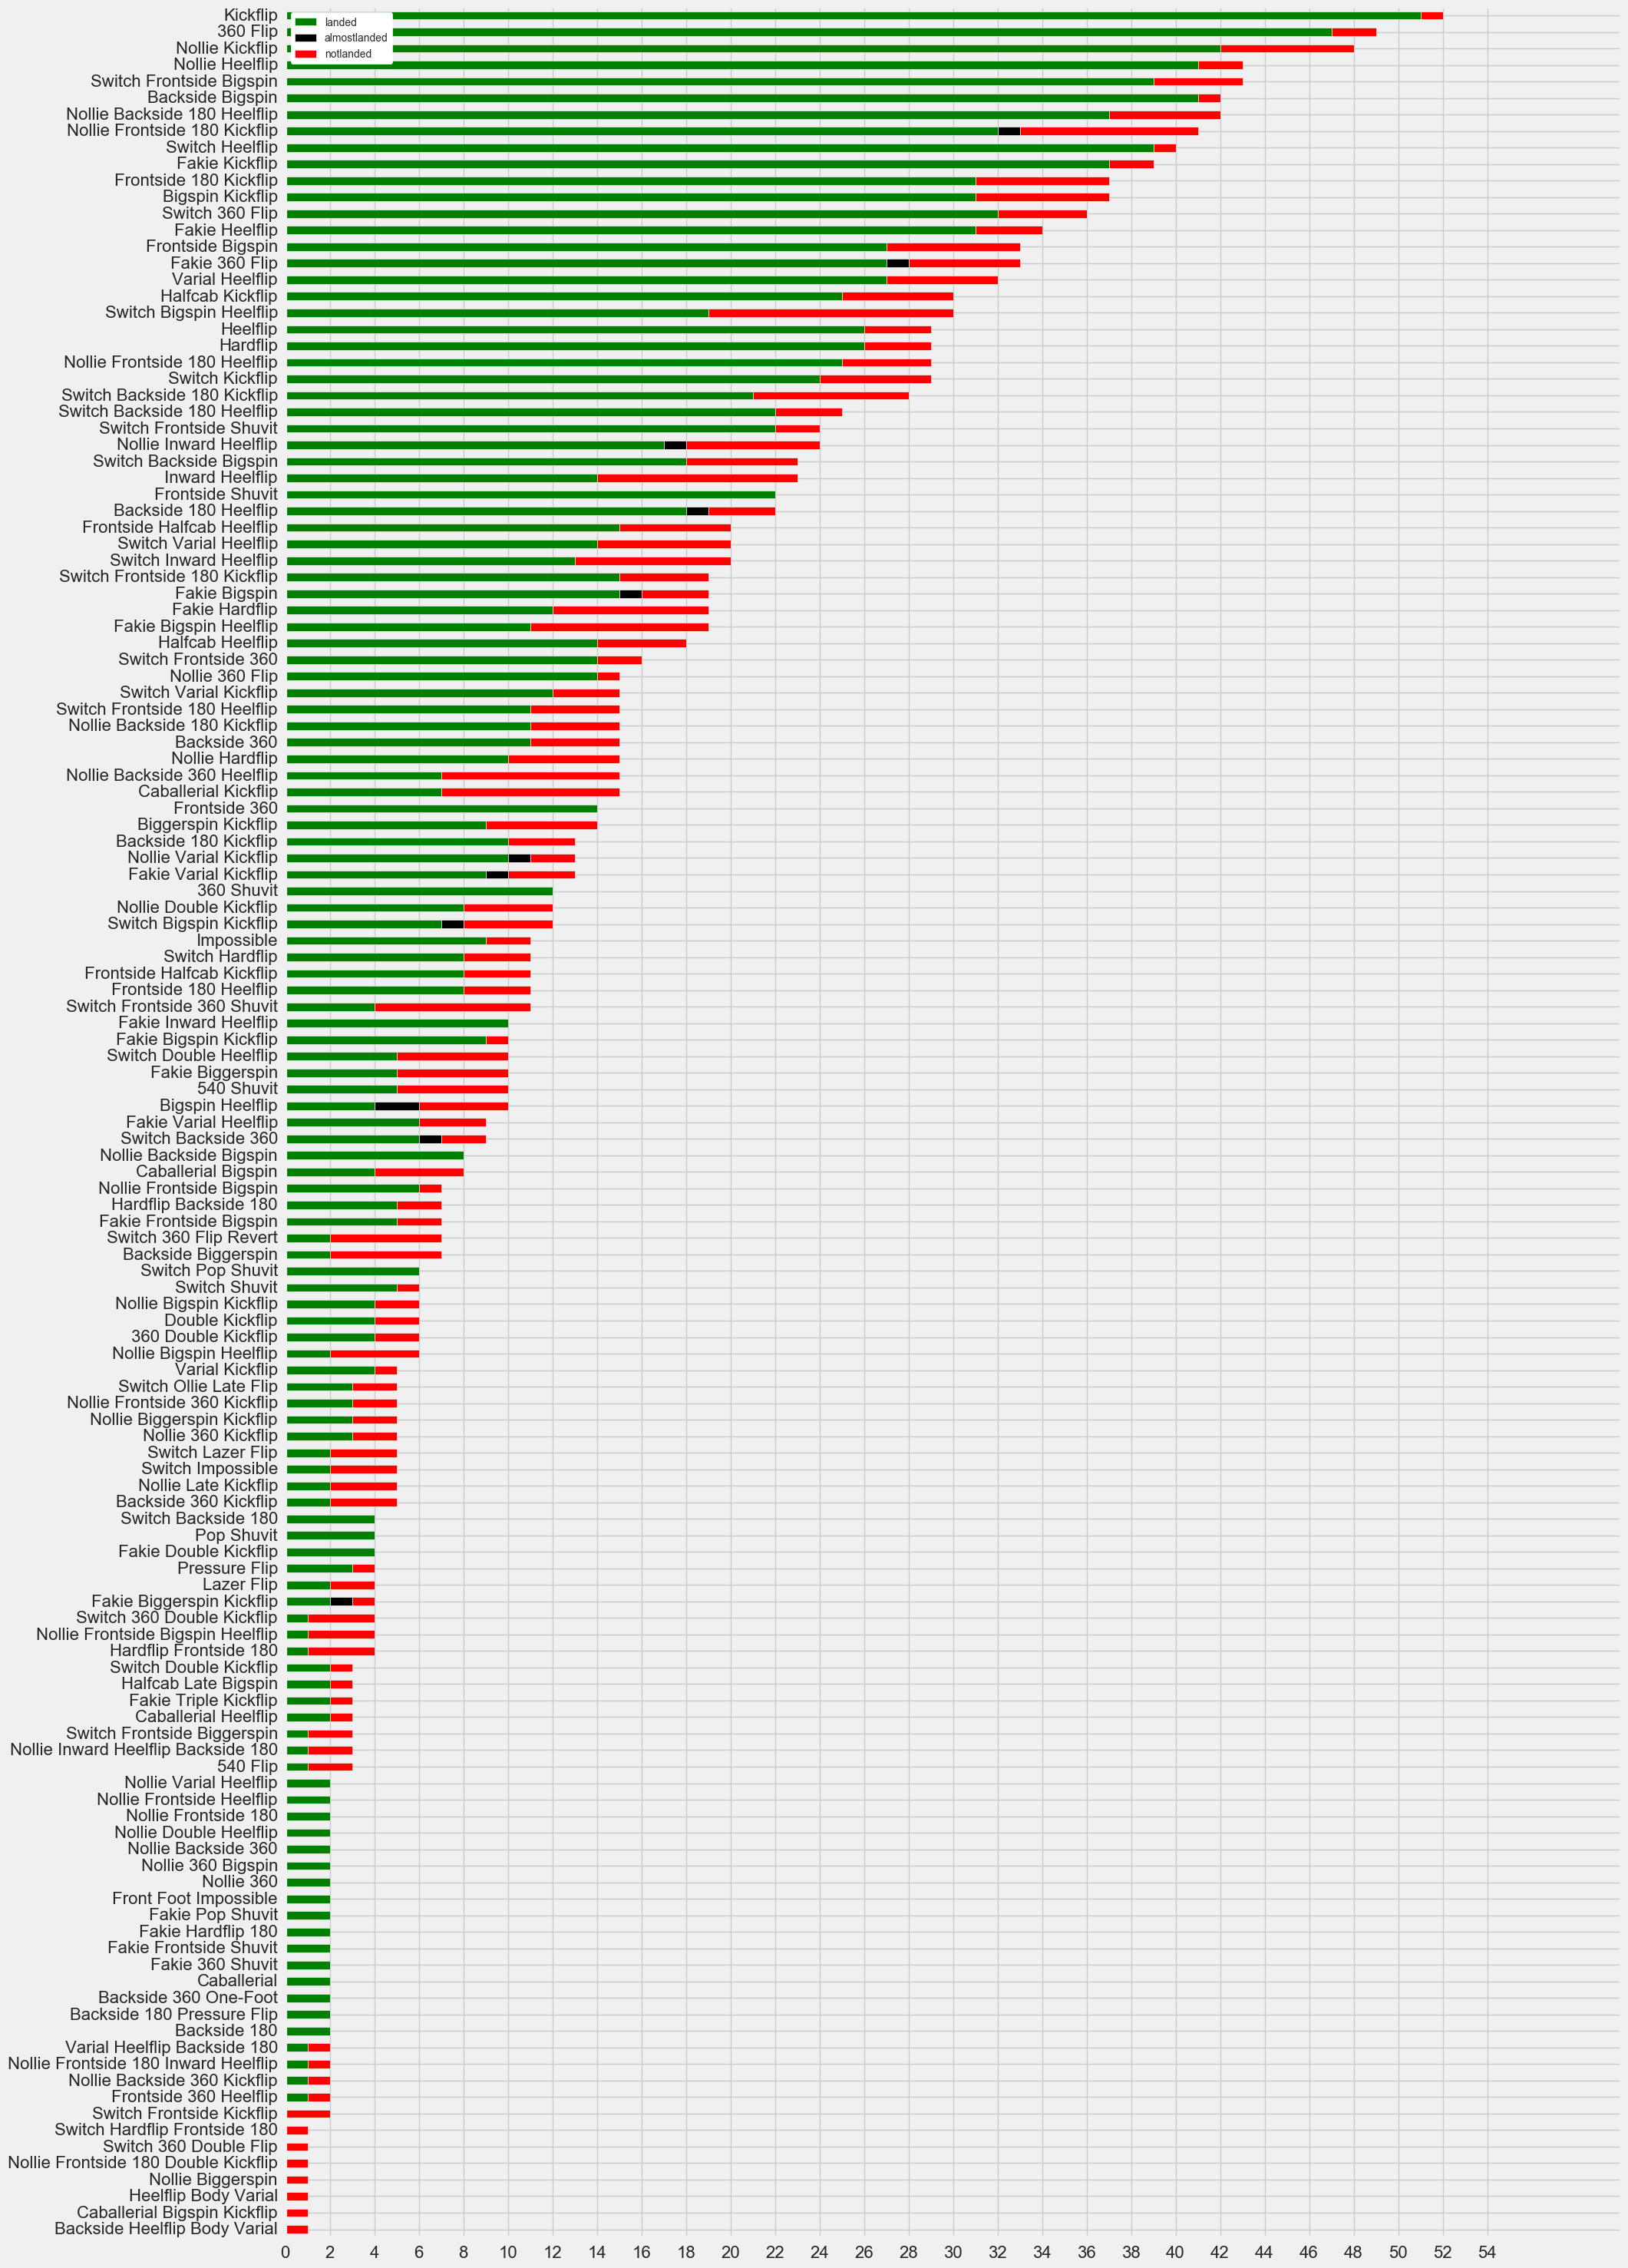

In [21]:
landed_df.sort_values(['Total', 'landed', 'notlanded'])[['landed','almostlanded','notlanded']].plot(
    kind='barh', xticks=range(0,55,2), figsize=(20,35),
    stacked=True, fontsize=16, color=['green', 'black', 'red'])
legend = plt.legend(frameon = 1, loc='upper left')
frame = legend.get_frame()
frame.set_color('white')
plt.show()

## Who recovered more times when was already with SKAT?

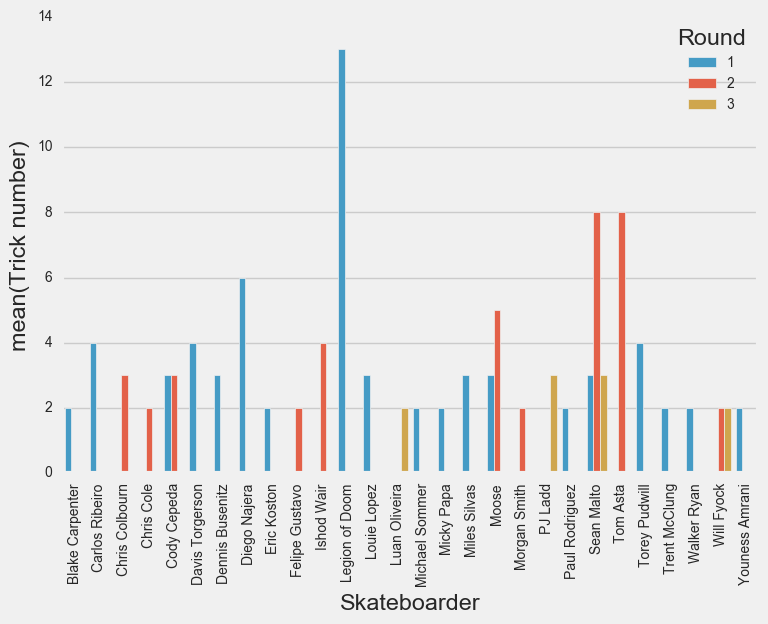

In [22]:
recovers = notlanded[notlanded.letters=='SKAT'][['Skateboarder', 'Round', 'Trick number']].groupby(['Skateboarder', 'Round'], as_index=False).agg('count').sort_values('Skateboarder')
sns.barplot(x="Skateboarder", y="Trick number", hue="Round", data=recovers) #, orient='h')
plt.xticks(rotation=90)
plt.show()
#recovers
#recovers.plot(kind='barh', xticks=range(15), stacked=True)
#plt.show()

### Is there a most likely trick for someone to be eliminated on?

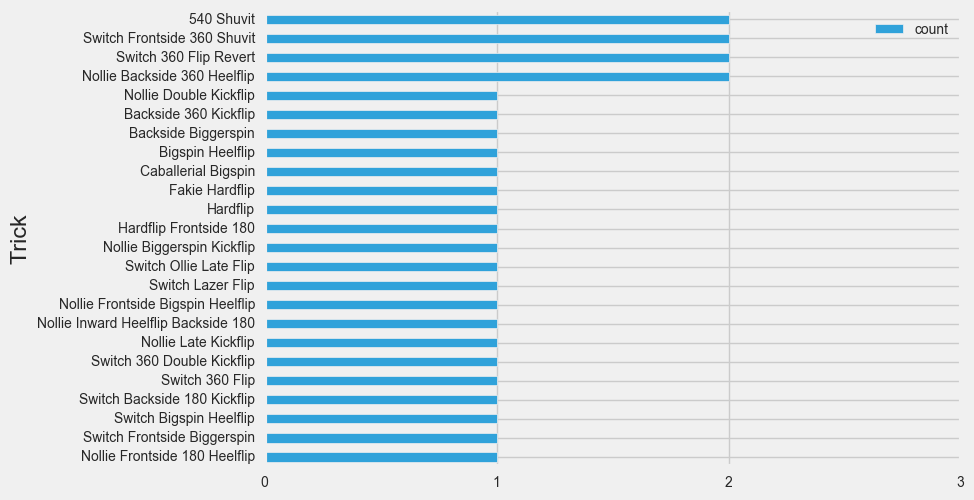

In [23]:
notlanded[notlanded.letters=='SKATE'][['Skateboarder', 'Trick']].groupby('Trick').agg('count').sort_values('Skateboarder').rename(columns={'Skateboarder': 'count'}).plot(kind='barh', xticks=range(4))
plt.show()

## How many tries did it take to get the first not-landed trick?

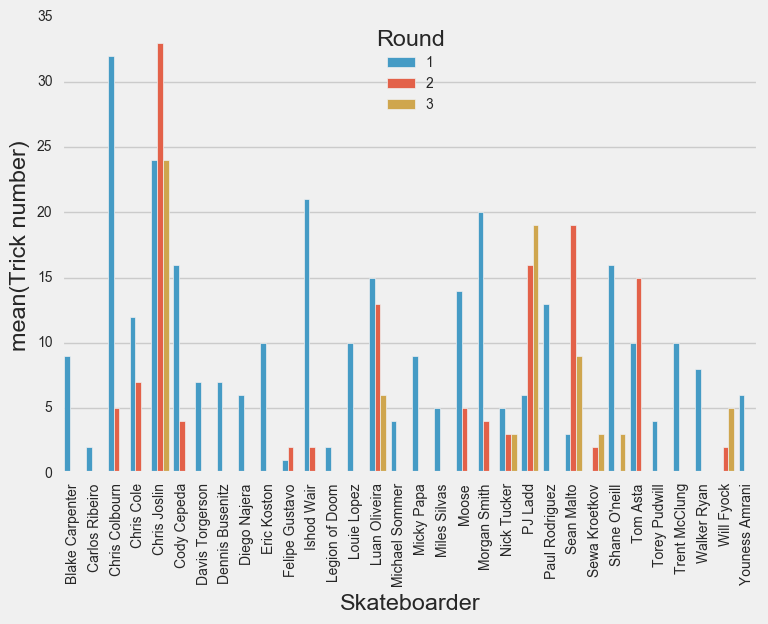

In [24]:
recovers = notlanded[['Skateboarder', 'Round', 'Trick number']].groupby(['Skateboarder', 'Round'], as_index=False).agg('min').sort_values('Skateboarder')
sns.barplot(x="Skateboarder", y="Trick number", hue="Round", data=recovers) #, orient='h')
plt.xticks(rotation=90)
plt.show()

By the way... Chris Joslin is so consistent!!

## What tricks are people most likely to try on offense when their opponent has SKAT?

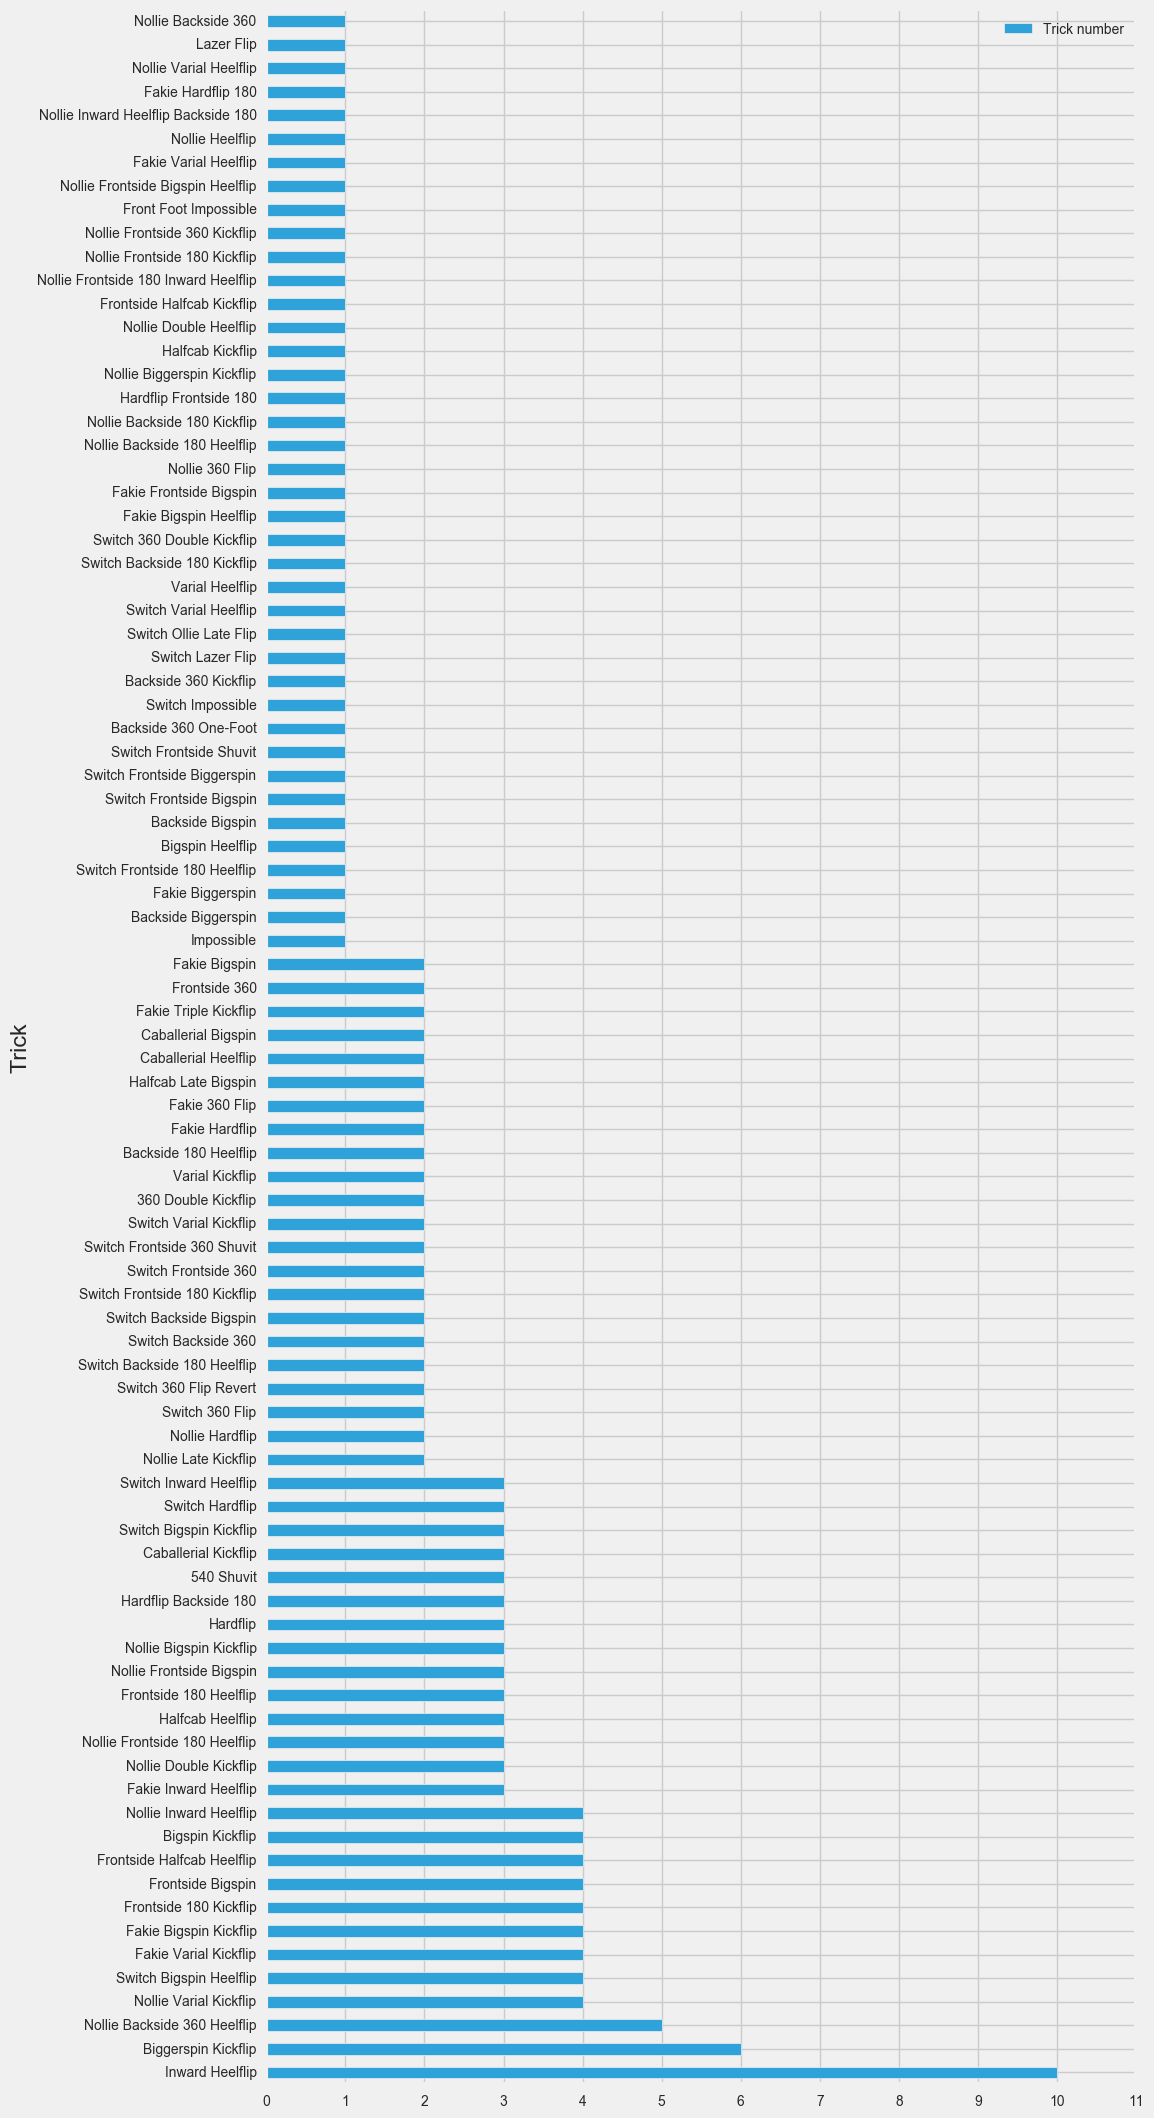

In [25]:
tricks_df[(tricks_df.letters=='SKAT') & (tricks_df['offensive/defensive'] == 'defensive')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number', ascending=False).plot(kind='barh', figsize=(10,25), xticks=range(12))
plt.show()

# Stats per finalist

In [26]:
finalists = ['Sewa Kroetkov', 'Chris Joslin', 'Nick Tucker', "Shane O'neill"]

## Number of tricks landed vs not-landed

In [27]:
finalists_df = tricks_df[tricks_df.Skateboarder.isin(finalists)][['Skateboarder', 'Status', 'Trick number']].replace('', 'Regular').groupby(['Skateboarder', 'Status'], as_index=False).agg('count')

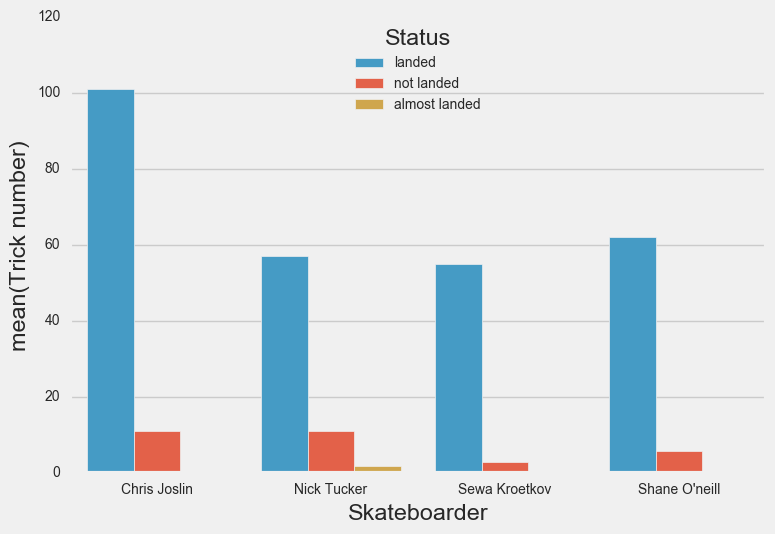

In [28]:
sns.barplot(x="Skateboarder", y="Trick number", hue="Status", data=finalists_df)
plt.show()

### Missing tricks (at least once) by the finalists

In [29]:
notlanded[notlanded.Skateboarder.isin(finalists)][['Skateboarder', 'Round', 'Trick', 'Against']]

,Skateboarder,Round,Trick,Against
294,Nick Tucker,1,Nollie Backside 180 Heelflip,Eric Koston
299,Nick Tucker,1,Fakie 360 Flip,Eric Koston
310,Nick Tucker,1,Nollie Inward Heelflip,Eric Koston
541,Shane O'neill,1,Switch 360 Double Flip,Davis Torgerson
545,Shane O'neill,1,360 Flip,Davis Torgerson
821,Chris Joslin,1,Nollie Backside 360 Heelflip,Diego Najera
829,Chris Joslin,1,Fakie Hardflip,Diego Najera
835,Chris Joslin,1,Backside 180 Kickflip,Diego Najera
837,Chris Joslin,1,Switch Backside 180 Kickflip,Diego Najera
1060,Nick Tucker,2,Fakie Kickflip,Chris Cole


## Stance

### In offensive tricks

In [30]:
finalists_df = tricks_df[(tricks_df.Skateboarder.isin(finalists)) &
          (tricks_df['offensive/defensive']=='offensive') &
          (tricks_df.Status=='landed')][['Skateboarder', 'stance', 'Trick number']].replace('', 'Regular').groupby(['Skateboarder', 'stance'], as_index=False).agg('count')

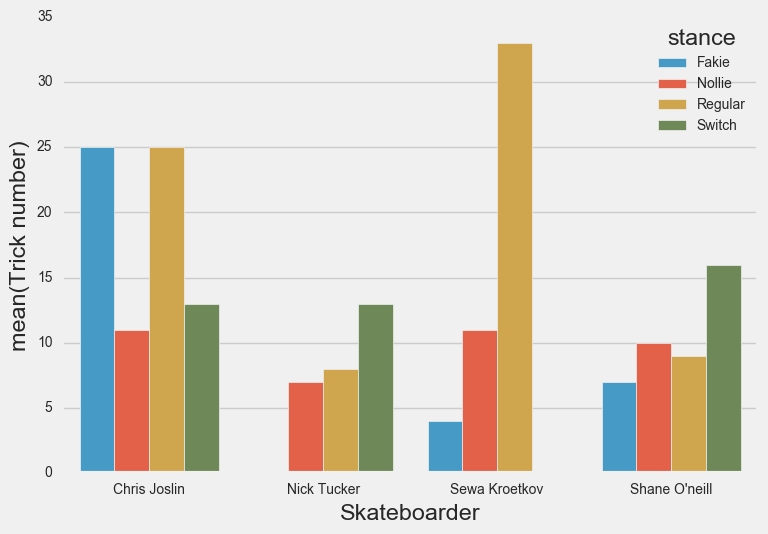

In [31]:
sns.barplot(x="Skateboarder", y="Trick number", hue="stance", data=finalists_df)
plt.show()

### Including offensive and defensive tricks

In [32]:
finalists_df = tricks_df[(tricks_df.Skateboarder.isin(finalists)) &
          (tricks_df.Status=='landed')][['Skateboarder', 'stance', 'Trick number']].replace('', 'Regular').groupby(['Skateboarder', 'stance'], as_index=False).agg('count')

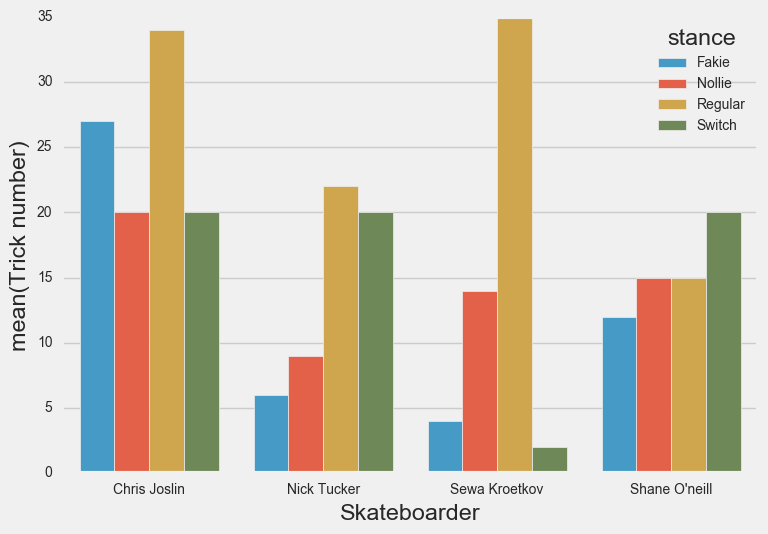

In [33]:
sns.barplot(x="Skateboarder", y="Trick number", hue="stance", data=finalists_df)
plt.show()

## Favorite flips

### In offensive tricks

In [34]:
finalists_df = tricks_df[(tricks_df.Skateboarder.isin(finalists)) &
                         (tricks_df['offensive/defensive']=='offensive') &
             (tricks_df.Status=='landed')][['Skateboarder', 'flip', 'Trick number']].replace('Flip', 'Kickflip').replace('', 'No flip').groupby(['Skateboarder', 'flip'], as_index=False).agg('count')

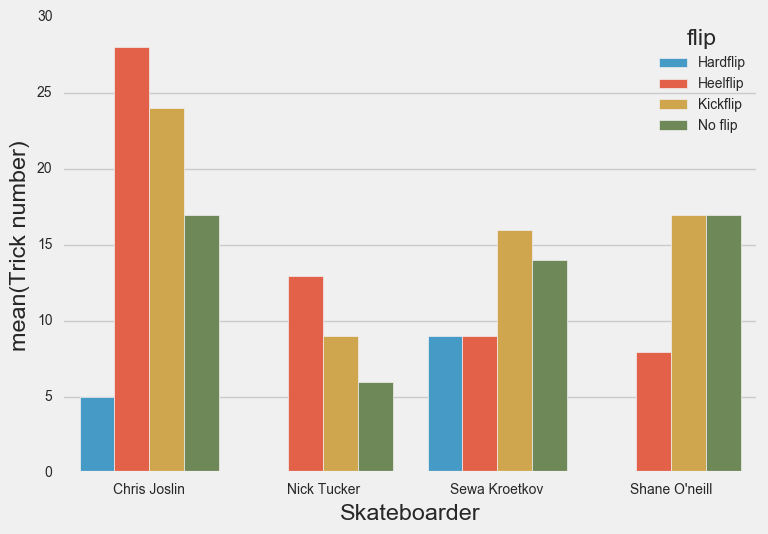

In [35]:
sns.barplot(x="Skateboarder", y="Trick number", hue="flip", data=finalists_df)
plt.show()

### Including offensive and defensive tricks

In [36]:
finalists_df = tricks_df[(tricks_df.Skateboarder.isin(finalists)) &
             (tricks_df.Status=='landed')][['Skateboarder', 'flip', 'Trick number']].replace('Flip', 'Kickflip').replace('', 'No flip').groupby(['Skateboarder', 'flip'], as_index=False).agg('count')

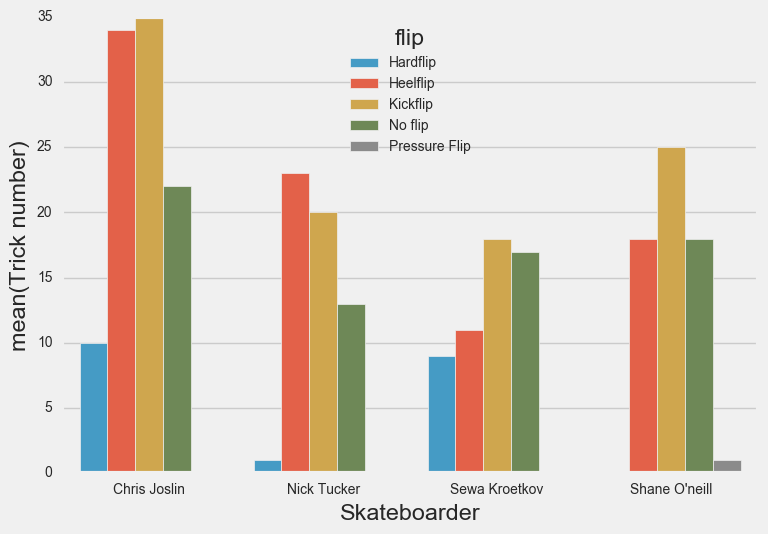

In [37]:
sns.barplot(x="Skateboarder", y="Trick number", hue="flip", data=finalists_df)
plt.show()

## Skate spin

### In offensive tricks

In [38]:
finalists_df = tricks_df[(tricks_df.Skateboarder.isin(finalists)) &
          (tricks_df['offensive/defensive']=='offensive') &
          (tricks_df.Status=='landed')][['Skateboarder', 'skate spin', 'Trick number']].replace('', 'No spin').groupby(['Skateboarder', 'skate spin'], as_index=False).agg('count')

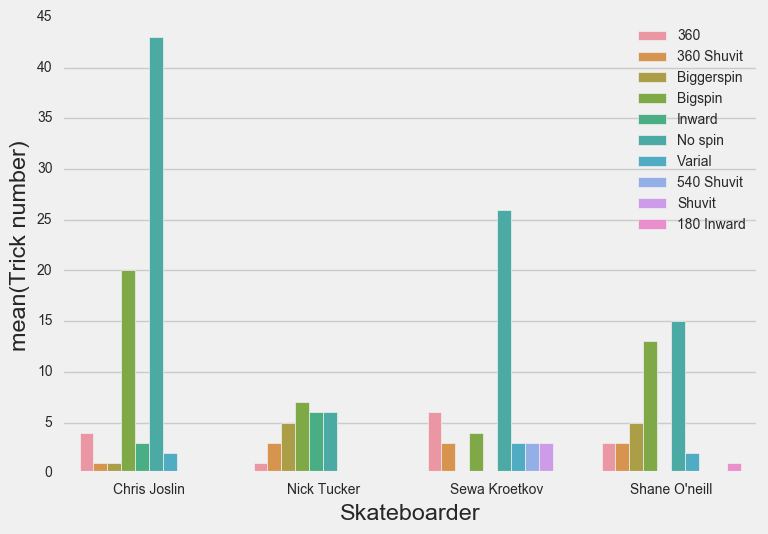

In [39]:
sns.barplot(x="Skateboarder", y="Trick number", hue="skate spin", data=finalists_df)
plt.legend(loc='upper right')
plt.show()

### Including offensive and defensive tricks

In [40]:
finalists_df = tricks_df[(tricks_df.Skateboarder.isin(finalists)) &
          (tricks_df.Status=='landed')][['Skateboarder', 'skate spin', 'Trick number']].replace('', 'No spin').groupby(['Skateboarder', 'skate spin'], as_index=False).agg('count')

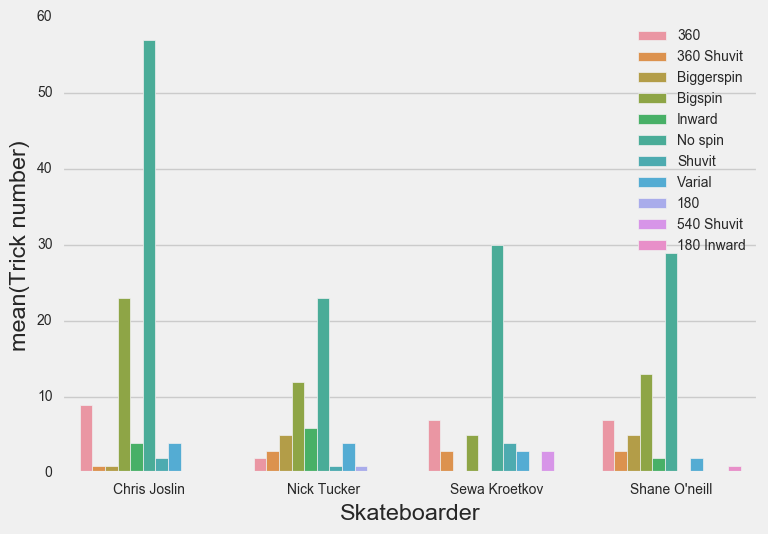

In [41]:
sns.barplot(x="Skateboarder", y="Trick number", hue="skate spin", data=finalists_df)
plt.legend(loc='upper right')
plt.show()

## Sewa Kroetkov

In [42]:
finalist = 'Sewa Kroetkov'

### Most offensive landed tricks

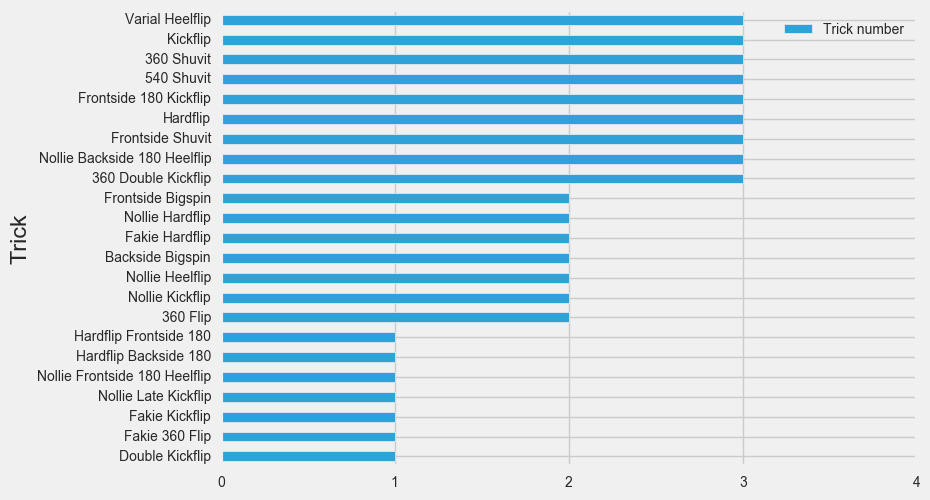

In [43]:
tricks_df[(tricks_df.Skateboarder==finalist) &
          (tricks_df['offensive/defensive']=='offensive') &
          (tricks_df.Status=='landed')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number').plot(kind='barh', xticks=range(5))
plt.show()

### Now including offensive and defensive landed tricks

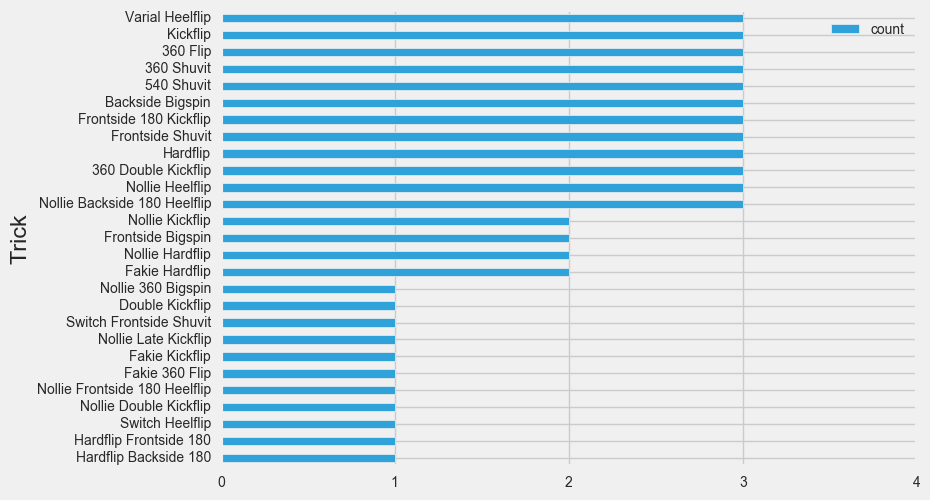

In [44]:
tricks_df[(tricks_df.Skateboarder==finalist) &
          (tricks_df.Status=='landed')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number').rename(columns={'Trick number': 'count'}).plot(kind='barh', xticks=range(5))
plt.show()

### Tricks not landed by opponent (at least once)

In [45]:
finalist_tricks_df = tricks_df[(tricks_df.Against == finalist) &
                               (tricks_df.Status=='not landed') & 
                               (tricks_df['offensive/defensive']=='defensive') &
                               (tricks_df.letters != 'SKATE')
                              ][['Skateboarder', 'Trick', 'Against', 'letters']]
finalist_tricks_df

,Skateboarder,Trick,Against,letters
565,Michael Sommer,Hardflip,Sewa Kroetkov,S
573,Michael Sommer,Backside Bigspin,Sewa Kroetkov,SK
579,Michael Sommer,Varial Heelflip,Sewa Kroetkov,SKA
583,Michael Sommer,360 Double Kickflip,Sewa Kroetkov,SKAT
585,Michael Sommer,540 Shuvit,Sewa Kroetkov,SKAT
1291,Cody Cepeda,Nollie Frontside 180 Heelflip,Sewa Kroetkov,S
1297,Cody Cepeda,Hardflip Backside 180,Sewa Kroetkov,SK
1301,Cody Cepeda,Nollie Hardflip,Sewa Kroetkov,SKA
1313,Cody Cepeda,Nollie Late Kickflip,Sewa Kroetkov,SKAT
1321,Cody Cepeda,Hardflip Frontside 180,Sewa Kroetkov,SKAT


### Counts

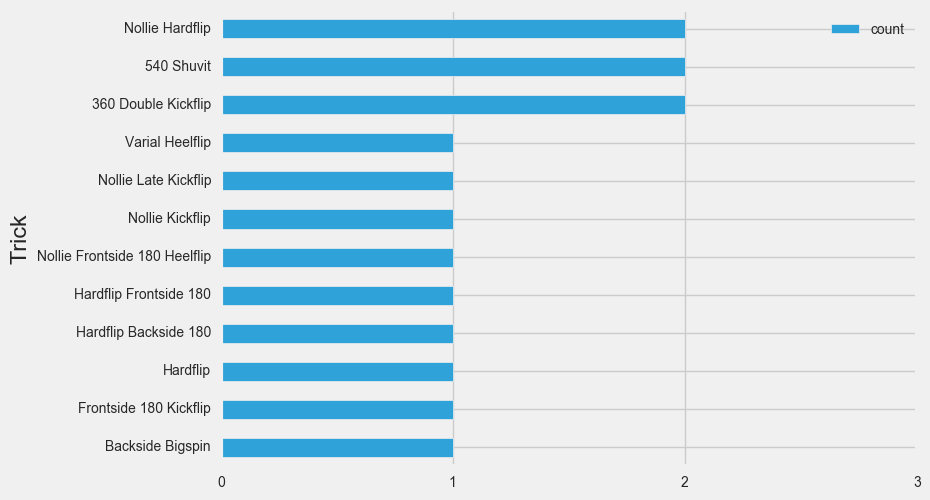

In [46]:
finalist_tricks_df[['Skateboarder','Trick']].groupby('Trick').agg('count').sort_values('Skateboarder').rename(columns={'Skateboarder': 'count'}).plot(kind = 'barh', xticks=range(4))
plt.show()

## Shane O'neill

In [47]:
finalist = "Shane O'neill"

### Most offensive landed tricks

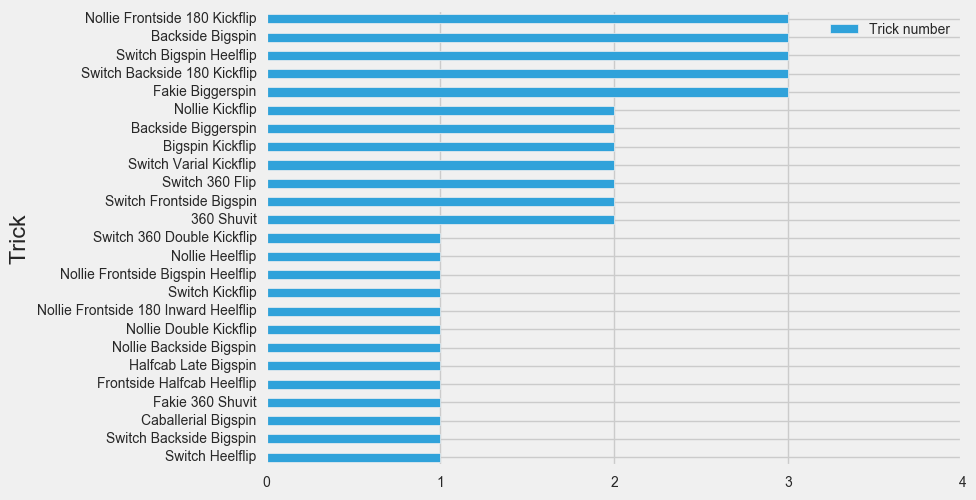

In [48]:
tricks_df[(tricks_df.Skateboarder==finalist) &
          (tricks_df['offensive/defensive']=='offensive') &
          (tricks_df.Status=='landed')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number').plot(kind='barh', xticks=range(5))
plt.show()

### Now including offensive and defensive landed tricks

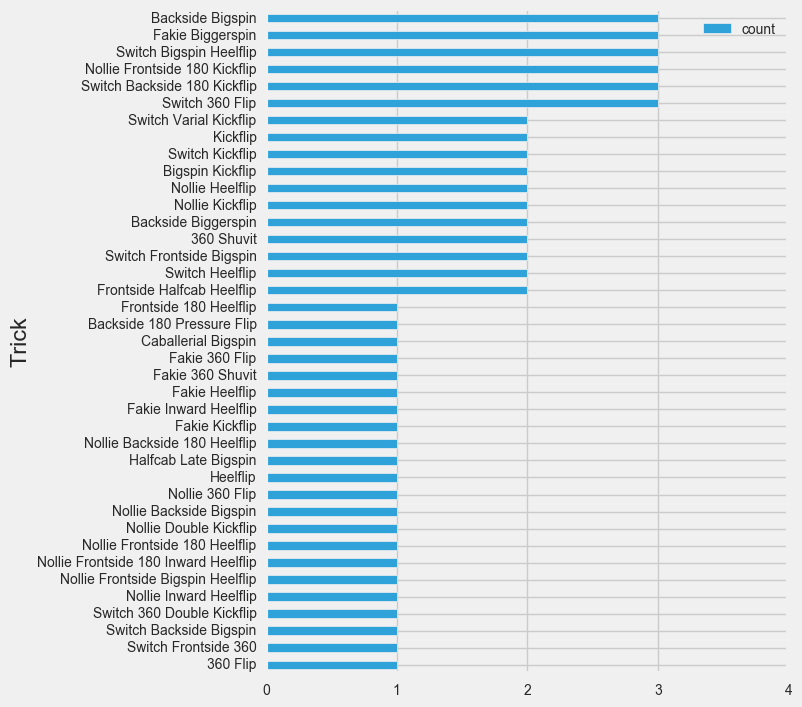

In [49]:
tricks_df[(tricks_df.Skateboarder==finalist) &
          (tricks_df.Status=='landed')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number').rename(columns={'Trick number': 'count'}).plot(kind='barh', xticks=range(5), figsize=(6,8))
plt.show()

### Tricks not landed by opponent (at least once)

In [50]:
finalist_tricks_df = tricks_df[(tricks_df.Against == finalist) &
                               (tricks_df.Status=='not landed') & 
                               (tricks_df['offensive/defensive']=='defensive') &
                               (tricks_df.letters != 'SKATE')
                              ][['Skateboarder', 'Trick', 'Against', 'letters']]
finalist_tricks_df

,Skateboarder,Trick,Against,letters
523,Davis Torgerson,Switch Backside Bigspin,Shane O'neill,S
531,Davis Torgerson,Fakie Biggerspin,Shane O'neill,SK
535,Davis Torgerson,Frontside Halfcab Heelflip,Shane O'neill,SKA
537,Davis Torgerson,Caballerial Bigspin,Shane O'neill,SKAT
539,Davis Torgerson,Switch Bigspin Heelflip,Shane O'neill,SKAT
556,Davis Torgerson,Backside Biggerspin,Shane O'neill,SKAT
1326,Ishod Wair,Switch Kickflip,Shane O'neill,S
1330,Ishod Wair,Nollie Frontside 180 Kickflip,Shane O'neill,SK
1334,Ishod Wair,Switch Backside 180 Kickflip,Shane O'neill,SKA
1336,Ishod Wair,Fakie Biggerspin,Shane O'neill,SKAT


### Counts

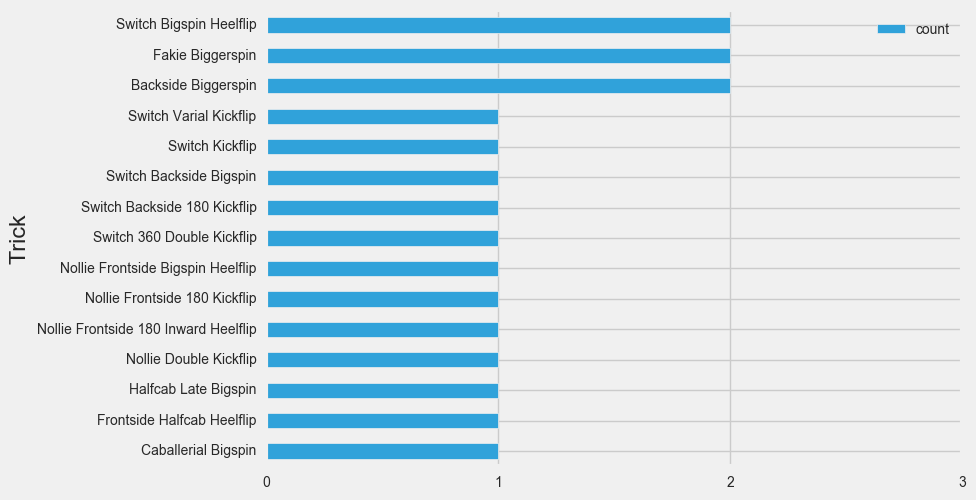

In [51]:
finalist_tricks_df[['Skateboarder','Trick']].groupby('Trick').agg('count').sort_values('Skateboarder').rename(columns={'Skateboarder': 'count'}).plot(kind = 'barh', xticks=range(4))
plt.show()

## Nick Tucker

In [52]:
finalist = 'Nick Tucker'

### Most offensive landed tricks

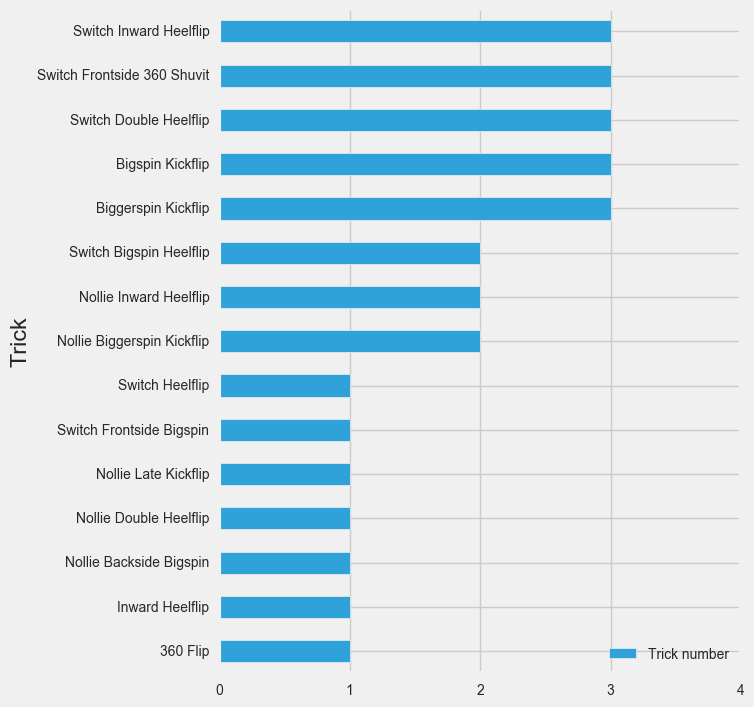

In [53]:
tricks_df[(tricks_df.Skateboarder==finalist) &
          (tricks_df['offensive/defensive']=='offensive') &
          (tricks_df.Status=='landed')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number').plot(kind='barh', xticks=range(5), figsize=(6,8))
plt.show()

### Now including offensive and defensive landed tricks

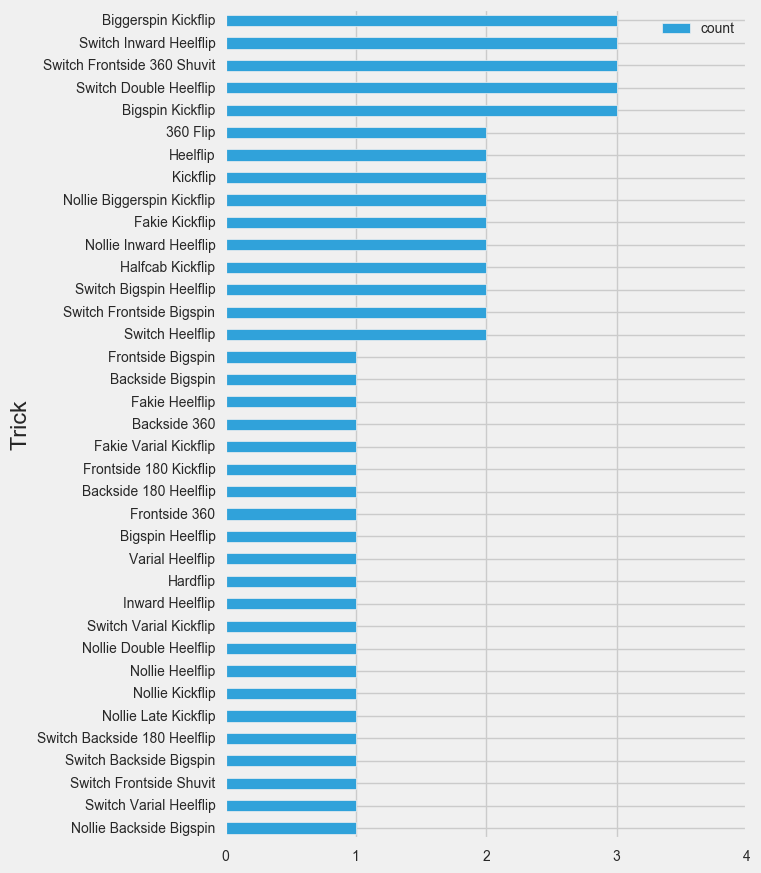

In [54]:
tricks_df[(tricks_df.Skateboarder==finalist) &
          (tricks_df.Status=='landed')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number').rename(columns={'Trick number': 'count'}).plot(kind='barh', xticks=range(5), figsize=(6,10))
plt.show()

### Tricks not landed by opponent (at least once)

In [55]:
finalist_tricks_df = tricks_df[(tricks_df.Against == finalist) &
                               (tricks_df.Status=='not landed') & 
                               (tricks_df['offensive/defensive']=='defensive') &
                               (tricks_df.letters != 'SKATE')
                              ][['Skateboarder', 'Trick', 'Against', 'letters']]
finalist_tricks_df

,Skateboarder,Trick,Against,letters
307,Eric Koston,Bigspin Kickflip,Nick Tucker,S
309,Eric Koston,Switch Double Heelflip,Nick Tucker,SK
321,Eric Koston,Switch Inward Heelflip,Nick Tucker,SKA
323,Eric Koston,Biggerspin Kickflip,Nick Tucker,SKAT
325,Eric Koston,Switch Frontside 360 Shuvit,Nick Tucker,SKAT
1087,Chris Cole,Switch Double Heelflip,Nick Tucker,S
1089,Chris Cole,Switch Bigspin Heelflip,Nick Tucker,SK
1095,Chris Cole,Switch Frontside 360 Shuvit,Nick Tucker,SKA
1099,Chris Cole,Biggerspin Kickflip,Nick Tucker,SKAT
1101,Chris Cole,Nollie Biggerspin Kickflip,Nick Tucker,SKAT


### Counts

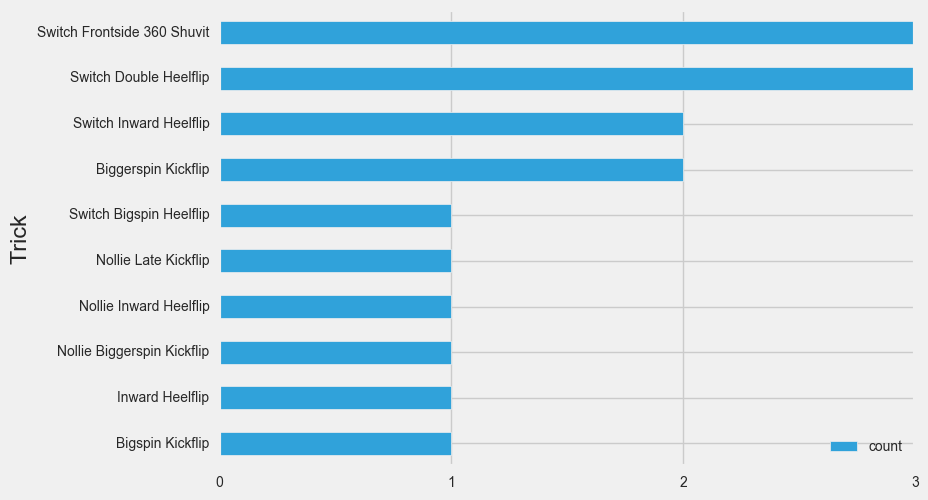

In [56]:
finalist_tricks_df[['Skateboarder','Trick']].groupby('Trick').agg('count').sort_values('Skateboarder').rename(columns={'Skateboarder': 'count'}).plot(kind = 'barh', xticks=range(4))
plt.show()

## Chris Joslin

In [57]:
finalist = 'Chris Joslin'

### Most offensive landed tricks

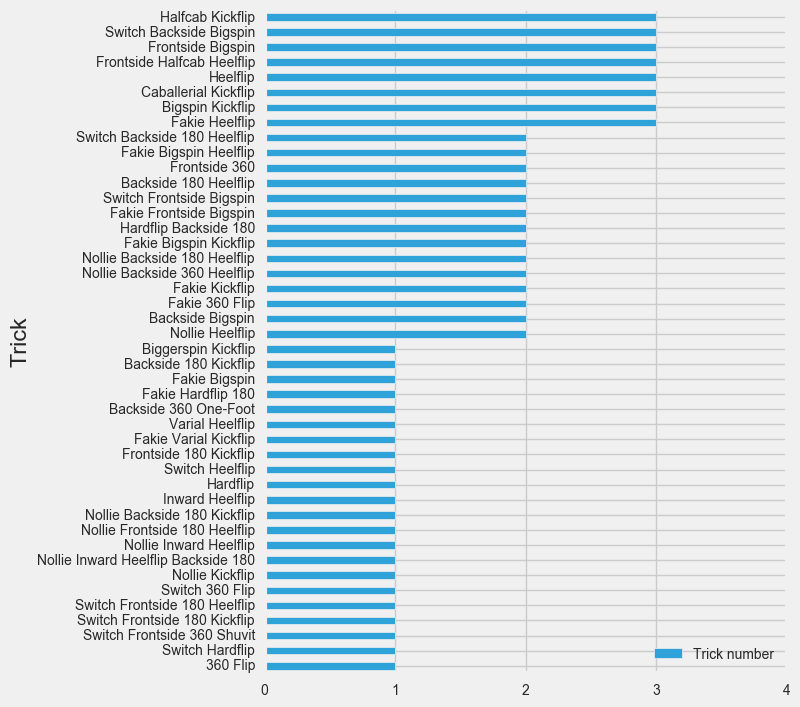

In [58]:
tricks_df[(tricks_df.Skateboarder==finalist) &
          (tricks_df['offensive/defensive']=='offensive') &
          (tricks_df.Status=='landed')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number').plot(kind='barh', xticks=range(5), figsize=(6,8))
plt.show()

### Now including offensive and defensive landed tricks

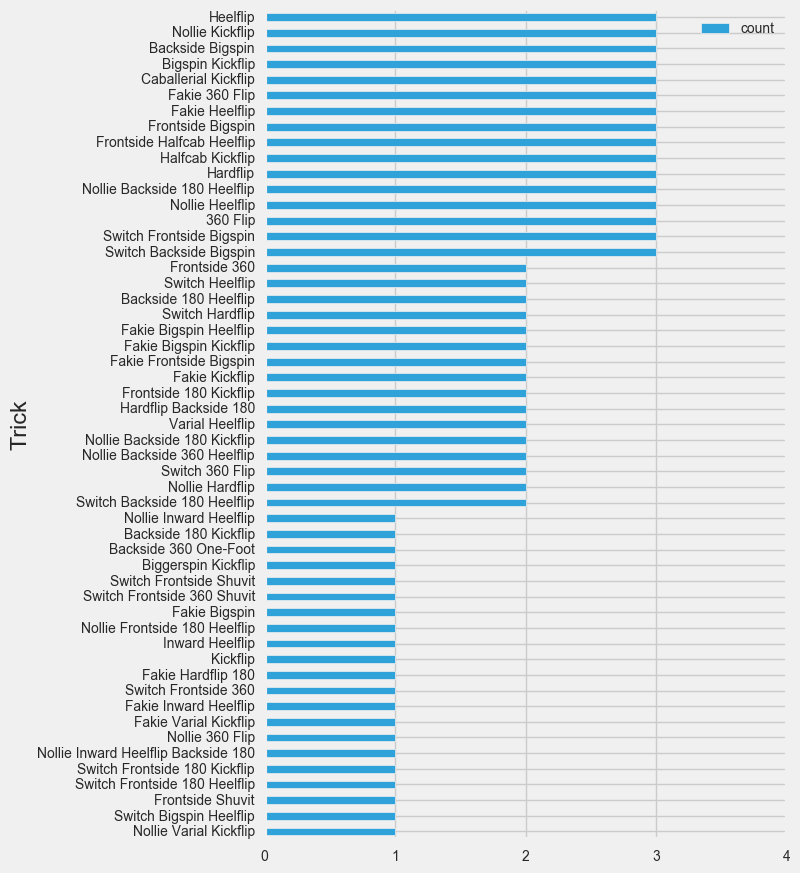

In [59]:
tricks_df[(tricks_df.Skateboarder==finalist) &
          (tricks_df.Status=='landed')][['Trick', 'Trick number']].groupby(['Trick']).agg('count').sort_values('Trick number').rename(columns={'Trick number': 'count'}).plot(kind='barh', xticks=range(5), figsize=(6,10))
plt.show()

### Tricks not landed by opponent (at least once)

In [60]:
finalist_tricks_df = tricks_df[(tricks_df.Against == finalist) &
                               (tricks_df.Status=='not landed') & 
                               (tricks_df['offensive/defensive']=='defensive') &
                               (tricks_df.letters != 'SKATE')
                              ][['Skateboarder', 'Trick', 'Against', 'letters']]
finalist_tricks_df

,Skateboarder,Trick,Against,letters
783,Diego Najera,Switch Backside Bigspin,Chris Joslin,S
785,Diego Najera,Heelflip,Chris Joslin,SK
787,Diego Najera,Fakie Heelflip,Chris Joslin,SKA
793,Diego Najera,Frontside Halfcab Heelflip,Chris Joslin,SKAT
795,Diego Najera,Frontside 180 Kickflip,Chris Joslin,SKAT
808,Diego Najera,Frontside Bigspin,Chris Joslin,SKAT
815,Diego Najera,Biggerspin Kickflip,Chris Joslin,SKAT
842,Diego Najera,Nollie Backside 360 Heelflip,Chris Joslin,SKAT
1141,Tom Asta,Halfcab Kickflip,Chris Joslin,S
1149,Tom Asta,Frontside Bigspin,Chris Joslin,SK


### Counts

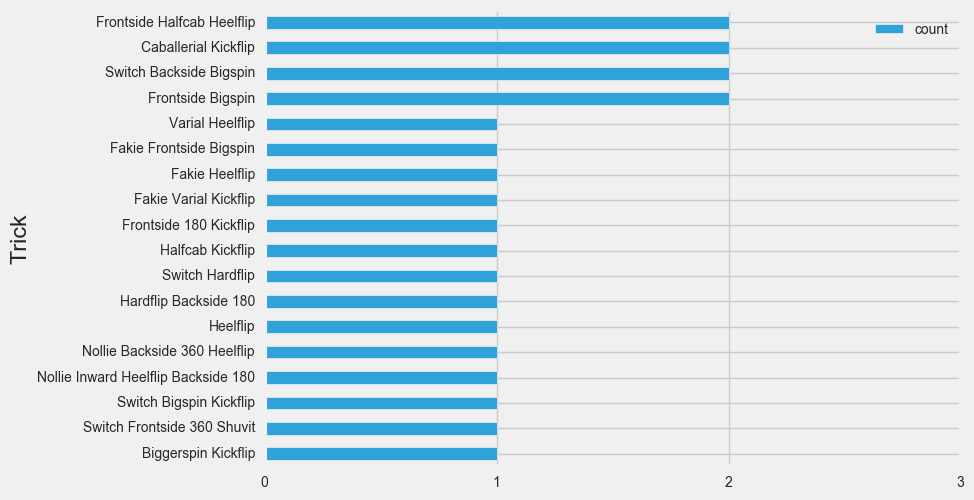

In [61]:
finalist_tricks_df[['Skateboarder','Trick']].groupby('Trick').agg('count').sort_values('Skateboarder').rename(columns={'Skateboarder': 'count'}).plot(kind = 'barh', xticks=range(4))
plt.show()

# Cluster/distance of skateboarders
For this analysis, I compared the tricks tried/landed by each skater. If they try/land the same tricks, then the distance between them is short and we can say they are similar. So we can say that Nick Tucker is more similar to Chris Joslin and Sewa than to Shane O'neill. We can also say that Chris Joslin is more similar to Nick Tucker, then Sewa, then Shane O'neill (the darker, the closer). The next plot shows the whole trick data with all tricks. The colors are showing the percentage of landed tries for each trick. This figure is also clustering skaters by tricks.
Click <a href="https://stats.stackexchange.com/questions/82326/how-to-interpret-the-dendrogram-of-a-hierarchical-cluster-analysis">here</a> to see more information about how to interpert a dendrogram.

In [62]:
tricks_simple = pd.DataFrame({
    'Skateboarder' : tricks_df['Skateboarder'],
    'Trick'        : tricks_df['Trick'],
    'Status'       : tricks_df['Status']
    })

tricks_simple = tricks_simple[tricks_simple.Skateboarder.isin(finalists)]
tricks_simple = tricks_simple.join(pd.get_dummies(tricks_simple['Status']))
tricks_simple.drop('Status', axis=1, inplace=True)
tricks_simple = tricks_simple.groupby(['Skateboarder', 'Trick'], as_index=False).agg('sum')
tricks_simple['perc_landed'] = 100 * tricks_simple.landed / tricks_simple[['almost landed', 'landed', 'not landed']].sum(axis=1)
#tricks_simple.head()
#landed_pivot = landed_simple.pivot_table(index='Skateboarder', columns='Trick')['count']
#landed_pivot.fillna(0, inplace=True)

In [63]:
tricks_pivot = tricks_simple.pivot_table(index='Skateboarder', columns='Trick')['perc_landed']
tricks_pivot.fillna(0, inplace=True)
#tricks_pivot.head()

In [64]:
from scipy.spatial.distance import pdist, squareform
from numpy import log
distances = pdist(tricks_pivot.values, metric='euclidean')
DistMatrix = squareform(distances)
DistMatrix_df = pd.DataFrame(DistMatrix,
                             index   = tricks_pivot.iloc[:,0].index.tolist(),
                             columns = tricks_pivot.iloc[:,0].index.tolist())

DistMatrix_df

,Chris Joslin,Nick Tucker,Sewa Kroetkov,Shane O'neill
Chris Joslin,0.000000,585.590870,633.113997,674.124947
Nick Tucker,585.590870,0.000000,591.960021,648.609624
Sewa Kroetkov,633.113997,591.960021,0.000000,639.226964
Shane O'neill,674.124947,648.609624,639.226964,0.000000


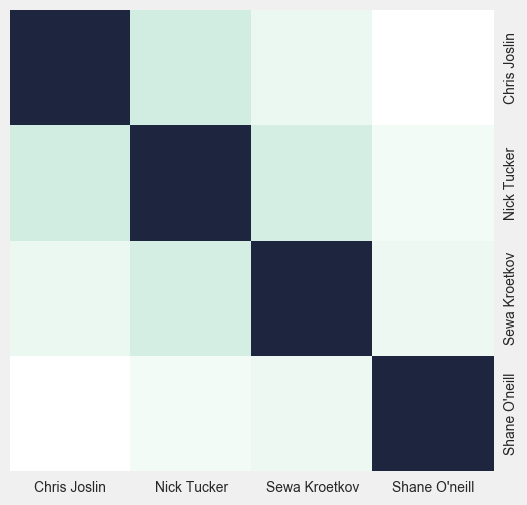

In [65]:
cmap = sns.cubehelix_palette(as_cmap=True, rot=-.3, light=1)
clustermap = sns.clustermap(-(DistMatrix_df/3)+350, row_cluster=False, col_cluster=False, cmap=cmap, figsize=(7,7))
clustermap.cax.set_visible(False)
clustermap.ax_row_dendrogram.set_visible(False)
clustermap.ax_col_dendrogram.set_visible(False)
plt.show()

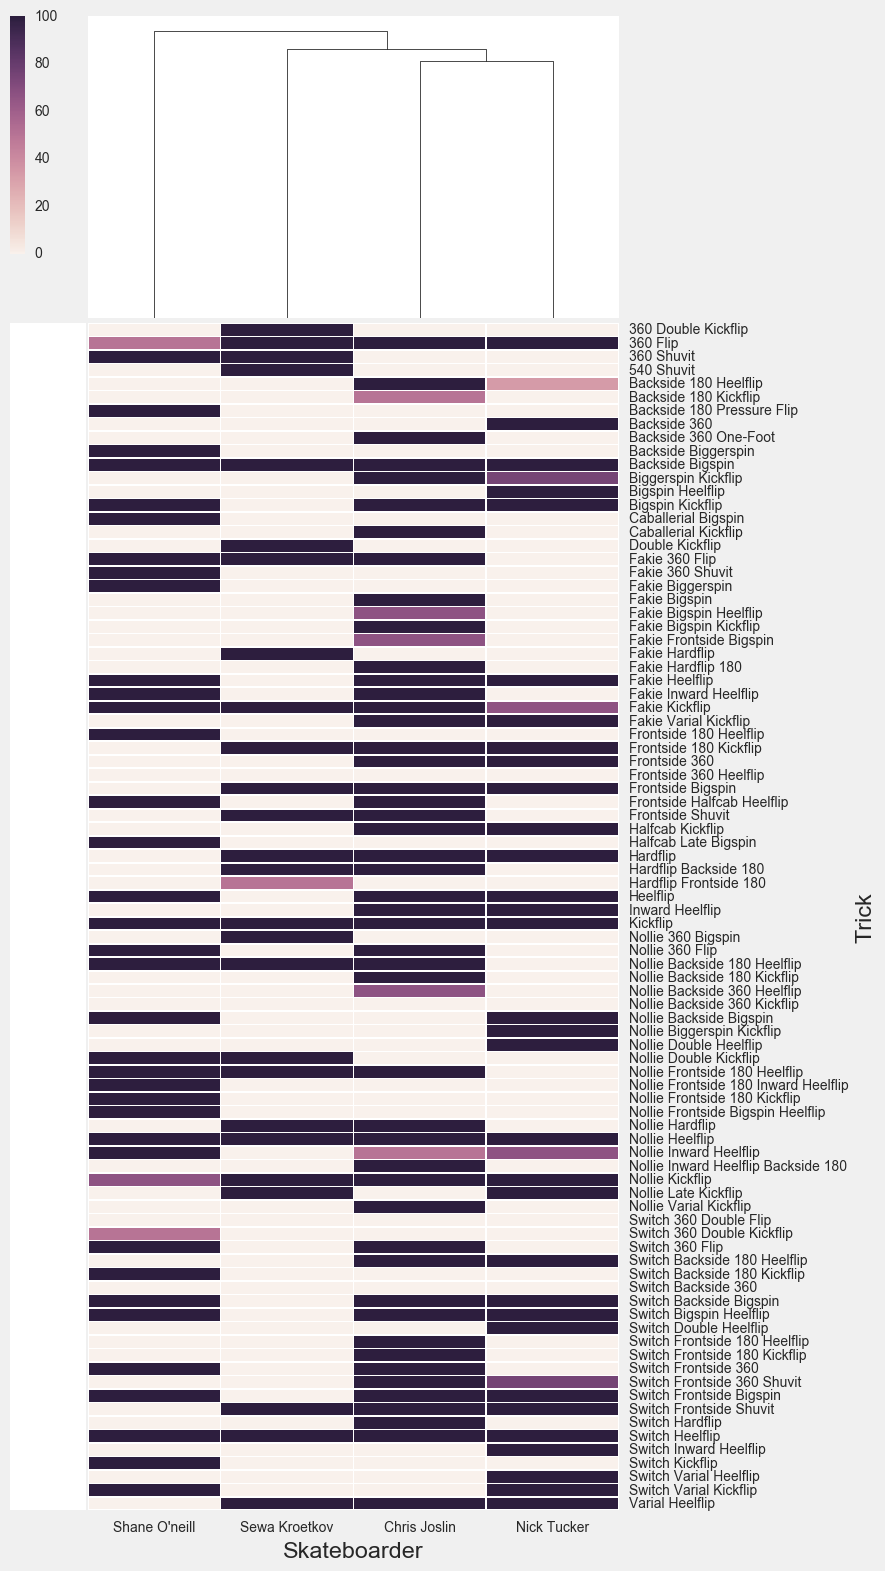

In [66]:
clustermap = sns.clustermap(tricks_pivot.T, row_cluster=False, figsize=(7,18), linewidths=.5)
#clustermap.cax.set_visible(False)
plt.setp(clustermap.ax_heatmap.get_yticklabels(), rotation=0)  # For y axis
plt.show()